$\large\textbf{Bayesian inference}$

#Q2.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

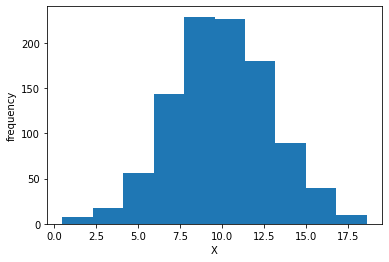

In [3]:
D_list = np.random.normal(10, 3, 1000)
plt.hist(D_list)
plt.xlabel('X')
plt.ylabel('frequency')
plt.show()

#Q3.



In [29]:
def prior(theta):
  if theta[1]>0:
    return 1
  else:
    return 0

#Q4.



In [30]:
def transition(theta):
  return [theta[0],np.random.normal(theta[1], 1)]

#Q5.

In [31]:
import math
def log_likelihood(theta,data_points):
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi)) - ((data_points-theta[0])**2)/(2*theta[1]**2))

Since log is a monotonic function hence it does not show different analysis from the function itself. So, Taking logarithm of the function is a good idea.

#Q6.

In [32]:
def acceptance(theta_new, theta_current, data, prior, likelihood):
  if likelihood(theta_new, data)+ np.log(prior(theta_new)) > likelihood(theta_current, data)+np.log(prior(theta_current)):
    return True
  else:
    r = np.random.uniform(0,1)
    if r< np.exp((likelihood(theta_new, data)+np.log(prior(theta_new)) - likelihood(theta_current, data)+np.log(prior(theta_current)))) :
      return True
    else:
      return False

#Q7.

In [33]:
def accepted_rejected_iter(prior,transition,likelihood, initial, number_iter,data,acceptance):
  accepted = []
  rejected = []
  Acc_iter = []
  Rej_iter = []
  current = initial
  for i in range(number_iter):
    new = transition(current)
    a = acceptance(new,current,data,prior,likelihood)
    if (a==True):
      accepted.append(new)
      Acc_iter.append(i)
      current = new
    else:
      rejected.append(new)
      Rej_iter.append(i)
  return accepted, rejected,Acc_iter,Rej_iter

For 200 iterations:

In [45]:
n_iter = 200
accepted, rejected,Acc_iter,Rej_iter = accepted_rejected_iter(prior,transition,log_likelihood,[10,0.1] ,n_iter,D_list,acceptance)
len(accepted)

21

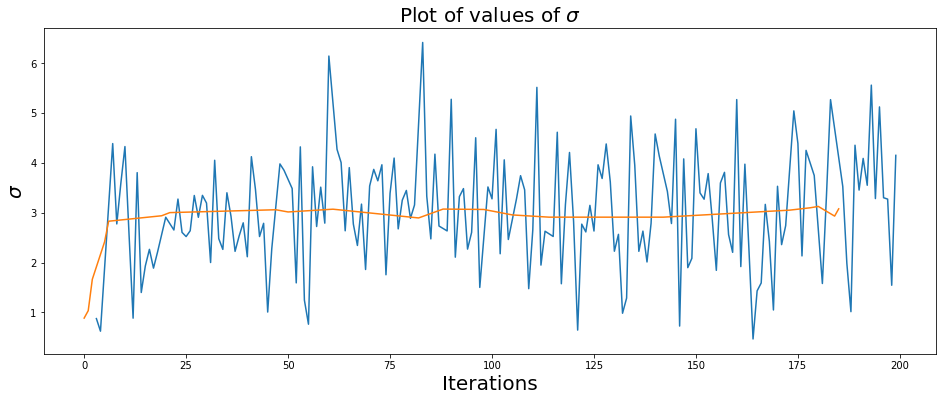

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][1] for i in range(len(rejected))],label='Rejected')
plt.plot(Acc_iter, [accepted[i][1] for i in range(len(accepted))],label='Accepted')
plt.title('Plot of values of $\sigma$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \sigma $', fontsize=20)
plt.show()

For 25000 iterations:

In [47]:
n_iter = 25000
accepted, rejected,Acc_iter,Rej_iter = accepted_rejected_iter(prior,transition,log_likelihood,[10,0.1] ,25000,D_list,acceptance)
len(accepted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


2161

In [48]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

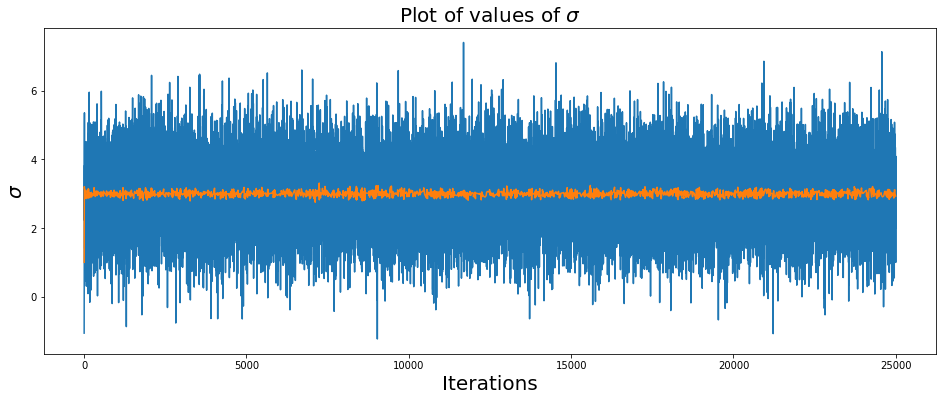

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][1] for i in range(len(rejected))],label='Rejected')
plt.plot(Acc_iter, [accepted[i][1] for i in range(len(accepted))],label='Accepted')
plt.title('Plot of values of $\sigma$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \sigma $', fontsize=20)
plt.show()

#Q8.

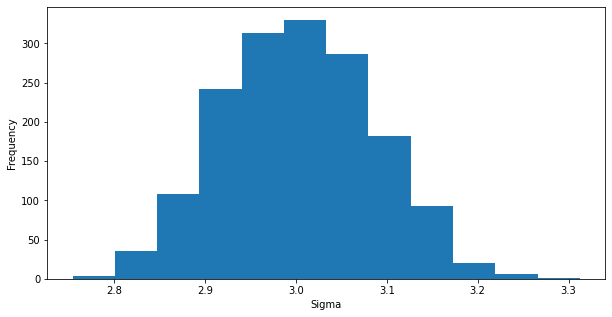

In [55]:
accept_list = [x[1] for x in accepted]
plt.figure(figsize = (10,5))
plt.hist(accept_list[int(0.25*len(accept_list))::],12)
plt.xlabel("Sigma")
plt.ylabel("Frequency")
plt.show()

#Q9.

In [56]:
from scipy.stats import uniform
def prior_bivariate(theta):
  if (theta[0]<=0):
    return 0
  elif (theta[0]<5) or (theta[0]>15):
    return 0
  else:
    return uniform.pdf(theta[0],5,15)

In [57]:
def transition(theta):
  return [np.random.multivariate_normal([theta[0],theta[1]],np.identity(2))[0], np.random.multivariate_normal([theta[0],theta[1]],np.identity(2))[1]]

In [58]:
def log_likelihood(theta, data):
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi)) - ((data-theta[0])**2)/(2*theta[1]**2))


In [64]:
def accepted_rejected_iter(prior,transition,likelihood, initial, number_iter,data,acceptance):
  accepted = []
  rejected = []
  Acc_iter = []
  Rej_iter = []
  current = initial
  for i in range(number_iter):
    new = transition(current)
    a = acceptance(new,current,data,prior,likelihood)
    if (a==True):
      accepted.append(new)
      Acc_iter.append(i)
      current = new
    else:
      rejected.append(new)
      Rej_iter.append(i)
  return accepted, rejected,Acc_iter,Rej_iter

#Q10.

For 200 iterations:

In [72]:
initial_mu_biv = 5
initial_sig_biv = 0.1
n_iter = 200
accepted, rejected, Acc_Iter, Rej_iter = accepted_rejected_iter(prior_bivariate,transition,log_likelihood, [initial_mu_biv, initial_sig_biv], n_iter,np.array(D_list),acceptance)
print('No. of accepted  μ  :' ,len(accepted))


No. of accepted  μ  : 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


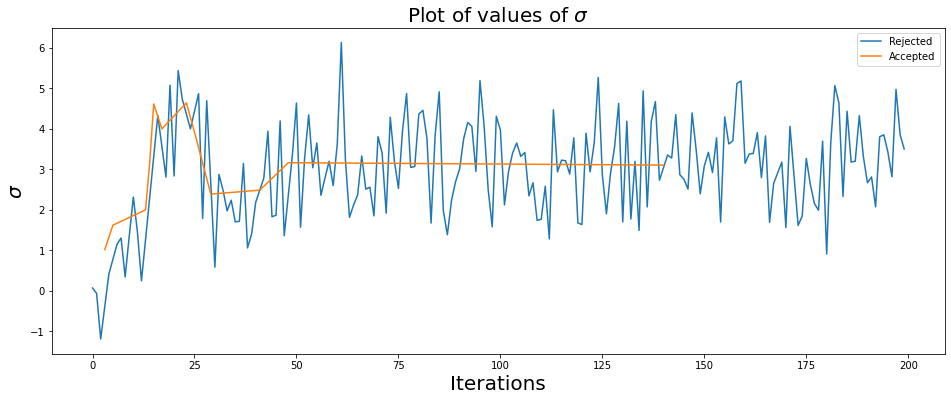

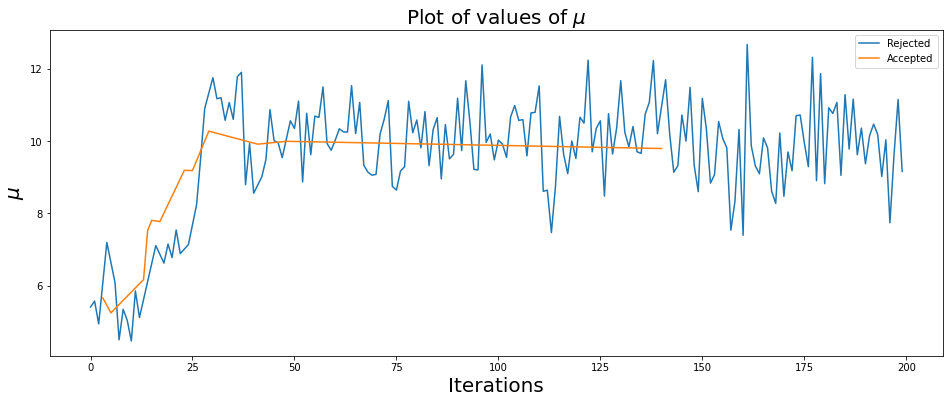

In [73]:
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][1] for i in range(len(rejected))],label='Rejected')
plt.legend()
plt.plot(Acc_Iter, [accepted[i][1] for i in range(len(accepted))],label='Accepted')
plt.legend()
plt.title('Plot of values of $\sigma$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \sigma $', fontsize=20)
plt.show()
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][0] for i in range(len(rejected))],label='Rejected')
plt.legend()
plt.plot(Acc_Iter, [accepted[i][0] for i in range(len(accepted))],label='Accepted')
plt.legend()
plt.title('Plot of values of $\mu$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \mu $', fontsize=20)
plt.show()

We observe that the value of accepted sigma converges towards 3 and the value of accepted mu converges towards 10.

For 25000 Iterations:

In [74]:
n_iter = 25000
accepted, rejected, Acc_Iter, Rej_iter = accepted_rejected_iter(prior_bivariate,transition,log_likelihood, [initial_mu_biv, initial_sig_biv], n_iter,np.array(D_list),acceptance)
print('No. of accepted  μ  :' ,len(accepted))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


No. of accepted  μ  : 24


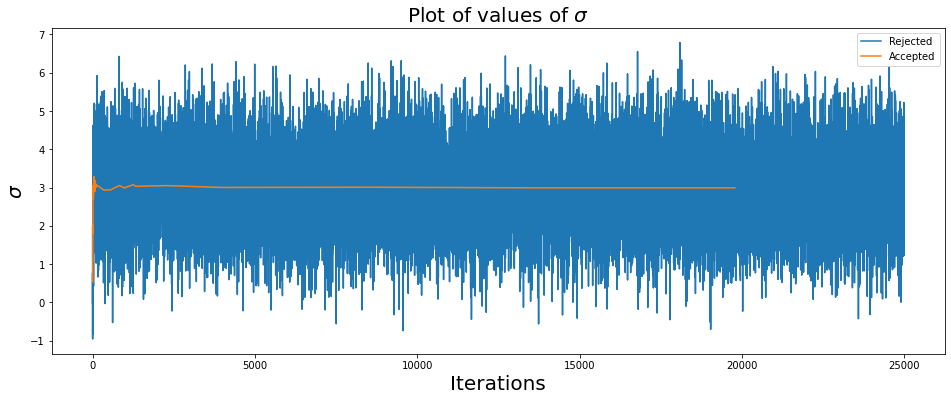

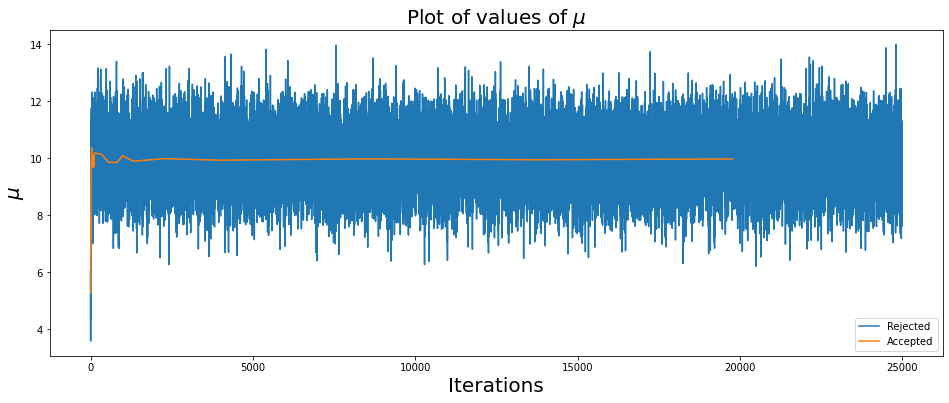

In [75]:
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][1] for i in range(len(rejected))],label='Rejected')
plt.legend()
plt.plot(Acc_Iter, [accepted[i][1] for i in range(len(accepted))],label='Accepted')
plt.legend()
plt.title('Plot of values of $\sigma$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \sigma $', fontsize=20)
plt.show()
plt.figure(figsize=(16,6))
plt.plot(Rej_iter, [rejected[i][0] for i in range(len(rejected))],label='Rejected')
plt.legend()
plt.plot(Acc_Iter, [accepted[i][0] for i in range(len(accepted))],label='Accepted')
plt.legend()
plt.title('Plot of values of $\mu$ ' , fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$ \mu $', fontsize=20)
plt.show()


After discarding 25% of accepted theta :

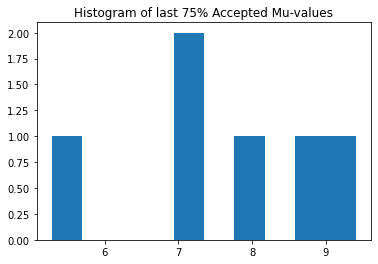

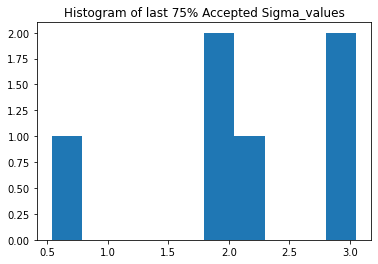

In [76]:
New_mu = [accepted[i][0] for i in range(int(0.25*len(accepted)))]
plt.hist(New_mu)
plt.title('Histogram of last 75% Accepted Mu-values')
plt.show()
New_sigma = [accepted[i][1] for i in range(int(0.25*len(accepted)))]
plt.hist(New_sigma)
plt.title('Histogram of last 75% Accepted Sigma_values')
plt.show()